<center><h2>Data Bootcamp Final Project Fall 2017<h2>
<h1>The Impact of Terrorism Political Stability<h1><center>

<h4>Author: Rayan Elsharkawi<h4>
<h4>Email: rayan@nyu.edu</h4>

<h2>Introduction

Considering current events, terrorist attacks have increased globally. I am interested in exploring the impact of terrorist attacks on political stability, or instability. This will reveal how small or big of an impact terrorism has on each country's stability. After descriptively exploring and analyzing the data, I will use basic regression methods to observe the statistical relationship between terrorism and political stability. I predict that increased terrorist activity is strongly tied to increased political instability.

<h2>Data and Variables

Obtaining data on terrorism is very difficult due to its scarcity. On the rise currently are metrics such as the Global Terrorism Index (GTI), an an all-encompassing metric based on four factors: the number of terrorist incidents per year, the number of fatalities caused by terrorists per year, the number of injuries caused by terrorists per year, and total property damage caused by terrorism per year. The problem with such metrics is that the data only exists, at least publicly and for free, for a very small number of observations for a specific year. Certainly, this is quite restricting. As a result, I have chosen to create my own aggregate variables from a dataset available on Kaggle called "Global Terrorism Database," provided by the University of Maryland. The data set is not available on the University of Maryland's website to the public; one must request special permission to be granted access to it.

Here is the link to the Kaggle dataset:
https://www.kaggle.com/ash316/terrorism-around-the-world/data

Here is the link to the University of Maryland's Terrorism Research website:
https://www.start.umd.edu/gtd/


From this data set, I will construct a terrorism casualities metric, by aggregating data on the number of fatalities caused by terrorism per country, and data on the number of injuries caused by terrorism per country, both of which exist for many years and many countries. Some of the goals of this project are to observe cross-country differences as well as trends over time. However, because this dataset is extremely large, I have removed all the data and variables of the years that I will not be analyzing in order to augment the speed of execution and to be able to post such an abbreviated dataset on Github.

The second variable that I will observe is the Political Stability Index (PSI) measures
The PSI ranges from -2.5 to 2.5, with -2.5 being extremely politically unstable, and 2.5 being extremely politically stable. The PSI data is obtained from: http://info.worldbank.org/governance/wgi/#home . This is a historical data set of the PSI of all countries over time. It includes, PSI estimates, PSI standard error, PSI ranges, etc. For the purpose of this project, I will use the PSI estimates. Once again, while offline, I downloaded and cleaned the excel sheet, removing all unwanted data. 

Due to the limitations of all of the data sets that I will use, I have decided to focus my research on data from the years 2014 to 2016.

<h2>Project Outline

1. Cleaning & Organizing the Datasets
2. Descriptive Analysis: Observing the Top 20 Countries with the Highest Casualities
3. Descriptive Analysis: Terrorism Density Graphs
4. Descriptive Analysis: Political Stability vs. Terrorism Density
5. Statistical Analysis: OLS regression with PSI and Terrorism
6. Concluding Remarks

<h2>Installing Packages

Below, I began by installing all the packages that I will be using to visualize and analyze the data.

In [148]:
from IPython.display import display, Image 
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np 
from mpl_toolkits.basemap import Basemap

import statsmodels.api as sm
import statsmodels.formula.api as smf

import plotly.plotly as py

import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

Here, I am linking the first data set that I will use, with the terrorism data, which was cleaned offline in order to minimize the file's size. The data will be placed into a dataframe.

In [170]:
path = 'C:\\Users\\Rayan\\Documents\\Junior Year\\Fall 2017\\Data Bootcamp\\Final Project\\globalterrorismdbshort.csv'

url1 = "https://github.com/rsharkawy/Data-Bootcamp-Final-Project/blob/master/globalterrorismdbshort.csv"

df = pd.read_csv(url1, low_memory=False, encoding='ISO-8859-1')

type(df)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 116, saw 3


<h2>Cleaning the Data

In this section, I am going to continue to organize the data. I commonly create copies of the original dataframe. This is because if I accidentally alter the dataframe, by using the drop command for example, I don't want the consequences to be difficult to reverse. After creating a copy, I observe the size of the dataframe.

In [171]:
df1 = df #created a copy of the dataframe

df.shape #returns (# of rows, # of columns) in the dataset

(45201, 14)

In [172]:
type(df1) #just to check that it is a dataframe indeed 

pandas.core.frame.DataFrame

Below, I am outputting the type of each of the variables (one variable per column), in order to familiarize myself with the data that I am dealing with.

In [173]:
df1.dtypes

eventid             float64
year                  int64
month                 int64
day                   int64
country              object
region               object
provstate            object
city                 object
latitude            float64
longitude           float64
summary              object
killed              float64
wounded             float64
totalCasualities    float64
dtype: object

I am renaming the column names in the dataset to facilitate my interaction with the data and minimize personal errors. After that, I finally create a new variable called totalCasualities, which as the name suggests, is the total number of casualities equivalent to the sum of all the people killed and injured in a terrorist attack.

Note that in this dataframe, each row is a terrorist event. Essentially, what this step is doing is aggregating the casualities for each event.

In [174]:
df1.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','nkill':'killed','nwound':'wounded'},inplace=True)

In [175]:
df1["totalCasualities"]=df1["killed"]+df1["wounded"]
df1.head()

eventid  year  month  day   country              region  \
0  2.010000e+11  2014      1    1  Colombia       South America   
1  2.010000e+11  2014      1    1   Somalia  Sub-Saharan Africa   
2  2.010000e+11  2014      1    1  Pakistan          South Asia   
3  2.010000e+11  2014      1    1  Pakistan          South Asia   
4  2.010000e+11  2014      1    1   Somalia  Sub-Saharan Africa   

            provstate        city   latitude  longitude  \
0  Norte de Santander  Convencion   8.868790 -73.194094   
1            Banaadir   Mogadishu   2.038353  45.342073   
2         Balochistan      Quetta  30.191332  67.003051   
3         Balochistan  Dera Bugti  29.033333  69.150000   
4         Middle Juba       Buale   1.097128  42.598368   

                                             summary  killed  wounded  \
0  01/01/2014: Assailants detonated an explosive ...     0.0      0.0   
1  01/01/2014: A suicide bomber detonated an expl...     4.0     20.0   
2  01/01/2014: A suicide bomber crashed an explos...     3.0     31.0   
3  01/01/2014: A land mine was found and defused ...     0.0      0.0   
4  01/01/2014: Assailants abducted ten individual...     NaN      NaN   

   totalCasualities  
0               0.0  
1              24.0  
2              34.0  
3               0.0  
4               NaN

In [176]:
df1.shape #ensuring that the dataframe is still the same size.

(45201, 14)

As previously mentioned, I am observing terrorism trends over the past three years, from 2014 to 2016. Below, I create duplicates of the terrorism dataframe such that each duplicate contains data strictly for one of the respective years.

In [177]:
df_2014 = df1[df1.year==2014]
df_2015 = df1[df1.year==2015]
df_2016 = df1[df1.year==2016]

I am interested in looking at aggregate casualities by country, rather than by individual event. So, I grouped all the events in each dataframe by country. Once again, I continue making new duplicate dataframes.

In [178]:
dfnew2014 = df_2014.groupby("country")
dfnew2015 = df_2015.groupby("country")
dfnew2016 = df_2016.groupby("country")

In [179]:
dfnew2015.head() #just to check and observe what the above dataframes would look like

eventid  year  month  day                   country  \
15820  2.010000e+11  2015      1    3                      Iraq   
16508  2.010000e+11  2015      1    1        Bosnia-Herzegovina   
16860  2.020000e+11  2015      1    1                      Iraq   
16861  2.020000e+11  2015      1    1                    Sweden   
16862  2.020000e+11  2015      1    1                     Libya   
16863  2.020000e+11  2015      1    1                      Iraq   
16864  2.020000e+11  2015      1    1                      Iraq   
16865  2.020000e+11  2015      1    1                      Iraq   
16869  2.020000e+11  2015      1    1                    Turkey   
16870  2.020000e+11  2015      1    1                     India   
16871  2.020000e+11  2015      1    1               Afghanistan   
16872  2.020000e+11  2015      1    1                  Pakistan   
16873  2.020000e+11  2015      1    1                 Indonesia   
16874  2.020000e+11  2015      1    1                  Pakistan   
16875  2.020000e+11  2015      1    1                  Pakistan   
16877  2.020000e+11  2015      1    1               Afghanistan   
16878  2.020000e+11  2015      1    1  West Bank and Gaza Strip   
16879  2.020000e+11  2015      1    1                   Ukraine   
16880  2.020000e+11  2015      1    1                   Ukraine   
16881  2.020000e+11  2015      1    1                   Ukraine   
16882  2.020000e+11  2015      1    1                   Ukraine   
16883  2.020000e+11  2015      1    1                   Ukraine   
16891  2.020000e+11  2015      1    1                   Nigeria   
16892  2.020000e+11  2015      1    1                  Cameroon   
16894  2.020000e+11  2015      1    1               Afghanistan   
16895  2.020000e+11  2015      1    1                     India   
16896  2.020000e+11  2015      1    1                     Yemen   
16897  2.020000e+11  2015      1    1                     Yemen   
16898  2.020000e+11  2015      1    1                     Yemen   
16899  2.020000e+11  2015      1    1                     Syria   
...             ...   ...    ...  ...                       ...   
29725  2.020000e+11  2015     11    8                     Italy   
29744  2.020000e+11  2015     11    9                    Jordan   
29891  2.020000e+11  2015     11   12                     Italy   
29981  2.020000e+11  2015     11   14                    Canada   
30000  2.020000e+11  2015     11   14               Netherlands   
30059  2.020000e+11  2015     11   16                    Canada   
30113  2.020000e+11  2015     11   18        Bosnia-Herzegovina   
30188  2.020000e+11  2015     11   19                Kyrgyzstan   
30222  2.020000e+11  2015     11   20        Bosnia-Herzegovina   
30226  2.020000e+11  2015     11   20              South Africa   
30272  2.020000e+11  2015     11   21                   Finland   
30365  2.020000e+11  2015     11   23                 Argentina   
30434  2.020000e+11  2015     11   25                 Venezuela   
30648  2.020000e+11  2015     12    1                   Finland   
30678  2.020000e+11  2015     12    2               Ivory Coast   
30679  2.020000e+11  2015     12    2               Ivory Coast   
30754  2.020000e+11  2015     12    4                   Finland   
30811  2.020000e+11  2015     12    6                   Armenia   
30834  2.020000e+11  2015     12    7                    Kosovo   
30961  2.020000e+11  2015     12   11                  Ethiopia   
31044  2.020000e+11  2015     12   13                     Italy   
31118  2.020000e+11  2015     12   15                  Ethiopia   
31213  2.020000e+11  2015     12   18                     Italy   
31229  2.020000e+11  2015     12   18                   Estonia   
31327  2.020000e+11  2015     12   21                  Djibouti   
31361  2.020000e+11  2015     12   22                 Venezuela   
31515  2.020000e+11  2015     12   23                     Spain   
31611  2.020000e+11  2015     12   28                      

Below, I sum all the casualities and the number of terrorist attacks or events, from each event in order to obtain their total counts. I renamed the variable for simplicity.

In [180]:
dfnew2014 = df_2014.groupby('country')['totalCasualities'].agg(['sum','count'])
dfnew2015 = df_2015.groupby('country')['totalCasualities'].agg(['sum','count'])
dfnew2016 = df_2016.groupby('country')['totalCasualities'].agg(['sum','count'])

dfnew2014.rename(columns={'sum':'2014_sum_of_casualities', "count": "2014_number_of_terrorist_attacks"}, inplace=True)
dfnew2015.rename(columns={'sum':'2015_sum_of_casualities', "count": "2015_number_of_terrorist_attacks"}, inplace=True)
dfnew2016.rename(columns={'sum':'2016_sum_of_casualities', "count": "2016_number_of_terrorist_attacks"}, inplace=True)

dfnew2014.head()

2014_sum_of_casualities  2014_number_of_terrorist_attacks
country                                                               
Afghanistan                   9794.0                              1689
Albania                          3.0                                 2
Algeria                         67.0                                12
Australia                       11.0                                 8
Azerbaijan                       1.0                                 3

It is interesting to note the shape below. It indicates that not all of the countries in the world are observed in this dataset. This could imply that some countries do not have any terrorism at all or that there is no data on them.

In [181]:
dfnew2014.shape

(98, 2)

<h2>Observing Casualities From Terrorism

In this section, we will be exploring some descriptive qualities of the dataset that we are using. For each of the three years that we're exploring, I plotted the top twenty countries with the highest casualities. 

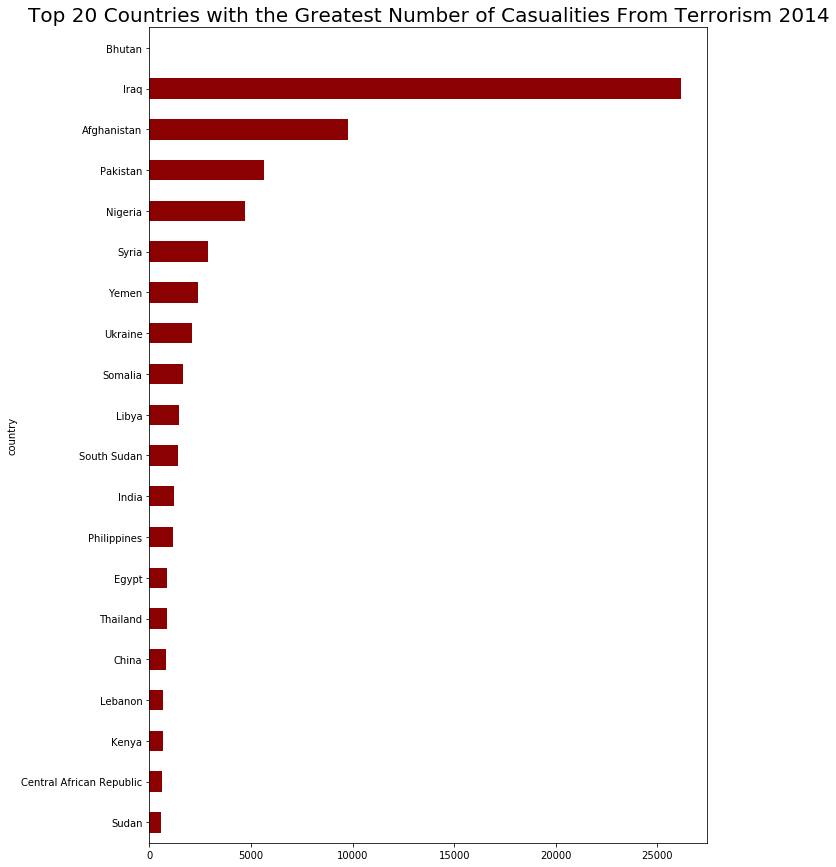

In [182]:
dfnew2014sorted = dfnew2014.sort_values("2014_sum_of_casualities")
dfnew2014sorted = dfnew2014sorted.tail(20)
dfnew2014sorted["2014_sum_of_casualities"].plot(kind="barh", figsize=(10, 15), color = "darkred")
plt.title("Top 20 Countries with the Greatest Number of Casualities From Terrorism 2014", fontsize=20)
plt.show()

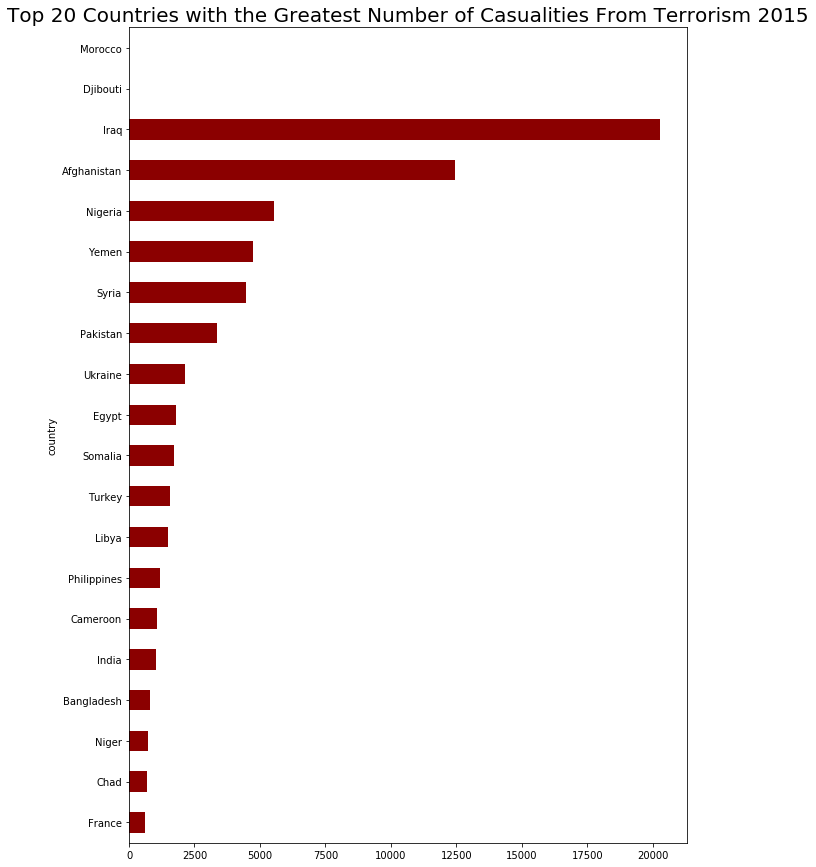

In [183]:
dfnew2015sorted = dfnew2015.sort_values("2015_sum_of_casualities")
dfnew2015sorted = dfnew2015sorted.tail(20)
dfnew2015sorted["2015_sum_of_casualities"].plot(kind="barh", figsize=(10, 15), color = "darkred")
plt.title("Top 20 Countries with the Greatest Number of Casualities From Terrorism 2015", fontsize=20)
plt.show()

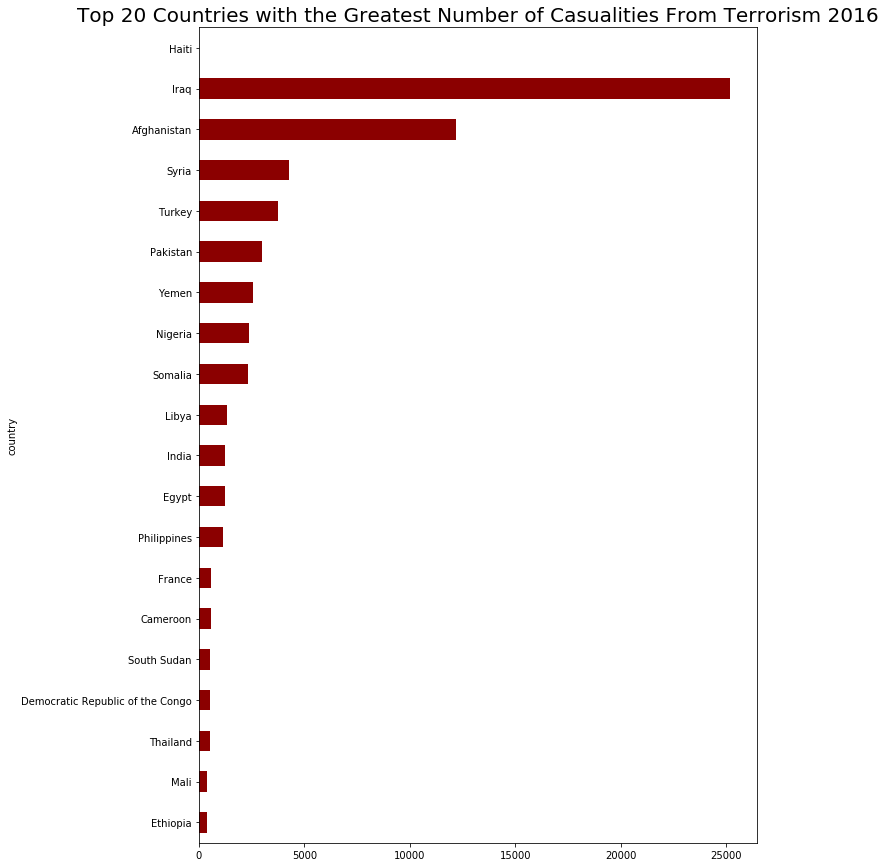

In [184]:
dfnew2016sorted = dfnew2016.sort_values("2016_sum_of_casualities")
dfnew2016sorted = dfnew2016sorted.tail(20)
dfnew2016sorted["2016_sum_of_casualities"].plot(kind="barh", figsize=(10, 15), color = "darkred")
plt.title("Top 20 Countries with the Greatest Number of Casualities From Terrorism 2016", fontsize=20)
plt.show()

<h3>Observations & Analysis

* Iraq and Afghanistan have been consistently dominating the top two positions from 2014 to 2016.
* Because I am Egyptian, I am always observative of data on Egypt. It is interesting to see that Egypt's casualities from terrorism increased from 2014 to 2015, but decreased in 2016.
* Another interesting point to note is the fact that all of the countries in the top 20 bar graphs are developing countries, primarily concentrated in the Middle East, Africa, and South Asia.
* A lot of the countries listed above consistently appeared in the top 20 graphs for all three years.

<h2>Global Distribution of Terrorist Attacks

In this section, we will continue to familiarize ourselves with the data. We do so by plotting each terrorist event in its respective year's graph from 2014 to 2016 to observe the density of terrorist attacks. This will tell us where these attacks tend to concentrate, if they do in a specific region or area.

In [185]:
df5 = df1[df1.year==2014]

C:\Users\Rayan\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.



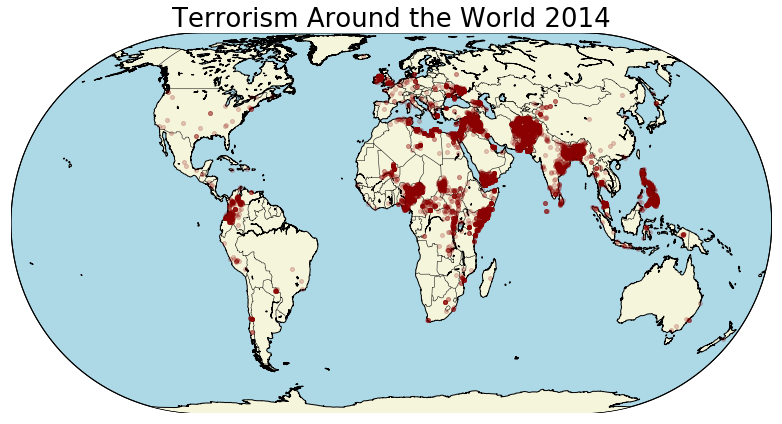

In [186]:
plt.figure(figsize=(17, 7))
m = Basemap(projection='eck4',lon_0=0,resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='beige',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')
x, y = m(list(df5["longitude"].values), (list(df5["latitude"].values)))
m.plot(x, y, "o", markersize = 4, color = "darkred", alpha = .2, zorder=5)

plt.title("Terrorism Around the World 2014", fontsize=26)
plt.show()  

In [187]:
df2 = df1[df1.year==2015]

C:\Users\Rayan\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.



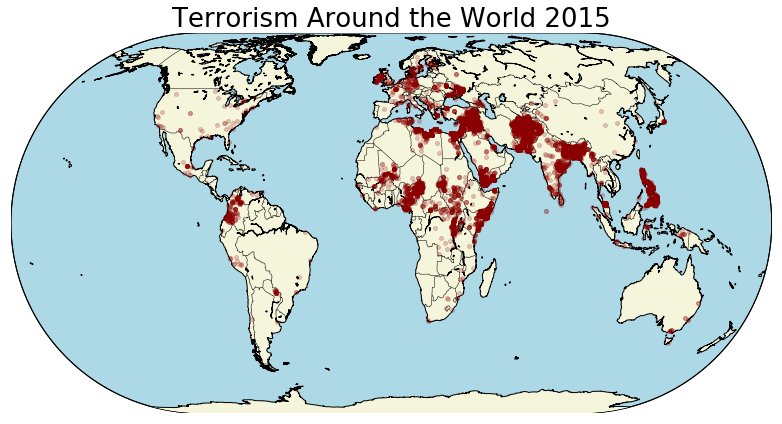

In [188]:
plt.figure(figsize=(17, 7))
m = Basemap(projection='eck4',lon_0=0,resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='beige',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')
x, y = m(list(df2["longitude"].values), (list(df2["latitude"].values)))
m.plot(x, y, "o", markersize = 4, color = "darkred", alpha = .2, zorder=5)

plt.title("Terrorism Around the World 2015", fontsize=26)
plt.show()  

In [189]:
df4 = df1[df1.year==2016]

C:\Users\Rayan\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.



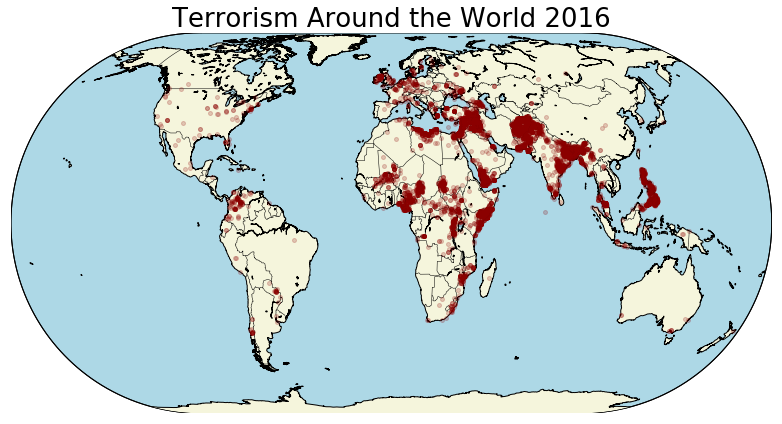

In [190]:
plt.figure(figsize=(17, 7))
m = Basemap(projection='eck4',lon_0=0,resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='beige',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')
x, y = m(list(df4["longitude"].values), (list(df4["latitude"].values)))
m.plot(x, y, "o", markersize = 4, color = "darkred", alpha = .2, zorder=5)

plt.title("Terrorism Around the World 2016", fontsize=26)
plt.show()  

<h3>Observations & Analysis

* Generally speaking, the regions that are densely populated with dots, representing terrorist attacks, are consistent over the course of the three years. Of course, there are some varying regions, some of which are pointed out below.
* In South America, the number of terrorist attacks greatly decreased from 2014 to 2016. Please keep in mind that just because the terrorist attacks have decreased, does not mean that these countries are politically more stable now. More on this discussion in the next section.
* Terrorist attacks have migrated down the South-Eastern coast of Africa from 2014 to 2016.
* The great number of terrorist attacks that concentrated around the Nile River in both Egypt and Sudan decreased from 2015 to 2016.
* Ireland has an extremely high terrorism density. I find this interesting because I don't really hear much about it on the news.
* Terrorism in Europe has increased gradually from 2014 to 2016.
* Regions with extremely high terrorism density include the Middle Eastern Gulf, South Asia (near and in Pakistan and India), Central Africa, and the United Kingdom.

<h2>Political Stability & Terrorism

As previously mentioned, political stability is explored using the Political Stability Index (PSI). Below, I retrieve the data and set it up in a dataframe.

In [191]:
url2 = "https://github.com/rsharkawy/Data-Bootcamp-Final-Project/blob/master/countrypsi20142016.csv"

df_psi = pd.read_csv(url2, low_memory=False, encoding='ISO-8859-1')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 116, saw 3


We continue to observe our data below. psi is short for the Political Stability Index. WBCode is a three letter country code, unique to each country. This is used in plotting geographic or spatial graphs as we will see later.

In [201]:
df_psindex = df_psi
df_psindex.head()

country  2014_psi  2015_psi  2016_psi WBCode
country                                                      
Aruba              Aruba      1.16      1.23      1.28    ABW
Andorra          Andorra      1.29      1.39      1.40    ADO
Afghanistan  Afghanistan     -2.41     -2.57     -2.75    AFG
Angola            Angola     -0.33     -0.50     -0.39    AGO
Anguilla        Anguilla      1.16      1.25      1.31    AIA

In [200]:
dfnew2014.head() #reminding ourselves of what this dataframe from before looks like. 
                    #going to merge this dataframe soon

2014_sum_of_casualities  2014_number_of_terrorist_attacks
country                                                               
Afghanistan                   9794.0                              1689
Albania                          3.0                                 2
Algeria                         67.0                                12
Australia                       11.0                                 8
Azerbaijan                       1.0                                 3

In [ ]:
df_psindex.index = df_psindex["country"] #setting the index so that I can merge on it later
df_psindex.head() 

Now we will concatenate the dataframes containing the aggregate casualities, with the dataframe containing the political stability index.

In [ ]:
frames14 = [dfnew2014, df_psindex]
frames15 = [dfnew2015, df_psindex]
frames16 = [dfnew2016, df_psindex]

combo2014 = pd.concat(frames14, axis=1, join='inner')
combo2015 = pd.concat(frames15, axis=1, join='inner')
combo2016 = pd.concat(frames16, axis=1, join='inner')

combo2014.head()

In [ ]:
combo2014.rename(columns={'WBCode':'iso_a3'}, inplace=True) #renaming the variables in order for them to match the next dataset
combo2015.rename(columns={'WBCode':'iso_a3'}, inplace=True)
combo2016.rename(columns={'WBCode':'iso_a3'}, inplace=True)

combo2014.head()

world is a Geodataframe, meaning it contains geospatial attributes that are used in plotting geographic maps. After initializing world, we create a copy of it containing only two of its attributes: geometry and iso_a3. The geometry attribute is essentially the polygon shape of each country on a map. This is crucial in creating chloropleth maps, which is what we will produce in a few steps. iso_a3 is the unique three letter country code attributed to each country.

We use the .head() function to explore what the Geodataframe contains.

In [204]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...  
2  POLYGON ((20.59024743010491 41.85540416113361,...  
3  POLYGON ((51.57951867046327 24.24549713795111,...  
4  (POLYGON ((-65.50000000000003 -55.199999999999...

In [205]:
type(world) #confirming the type

geopandas.geodataframe.GeoDataFrame

We merge each year's data with world on the country code: iso_a3. We do this in order to have a complete dataset that allows for the mapping of a country's polygon to a country's data records: PSI, aggregate casualities, etc.

In [ ]:
country_polygons = world[['geometry', 'iso_a3']]

country_polygons2014 = country_polygons
country_polygons2015 = country_polygons
country_polygons2016 = country_polygons

country_polygons2014 = country_polygons2014.merge(combo2014, on="iso_a3")
country_polygons2015 = country_polygons2015.merge(combo2015, on="iso_a3")
country_polygons2016 = country_polygons2016.merge(combo2016, on="iso_a3")

country_polygons2014.head()

We will now create three chloropleth graphs, one for each year we are observing. The shading and hue of the countries informs us about their PSI. Blue indicates a positive PSI which portrays a greater level of political stability. Red indicates a negative PSI, indicating a greater level of political instability. The minimum and maximum values for PSI are -2.5 and 2.5 respectively.

On top of the chloropleth map, we include a scatterplot layer. Each dot indicates a terrorist event. Moreover, this is plotting terrorism density on top of political stability index.

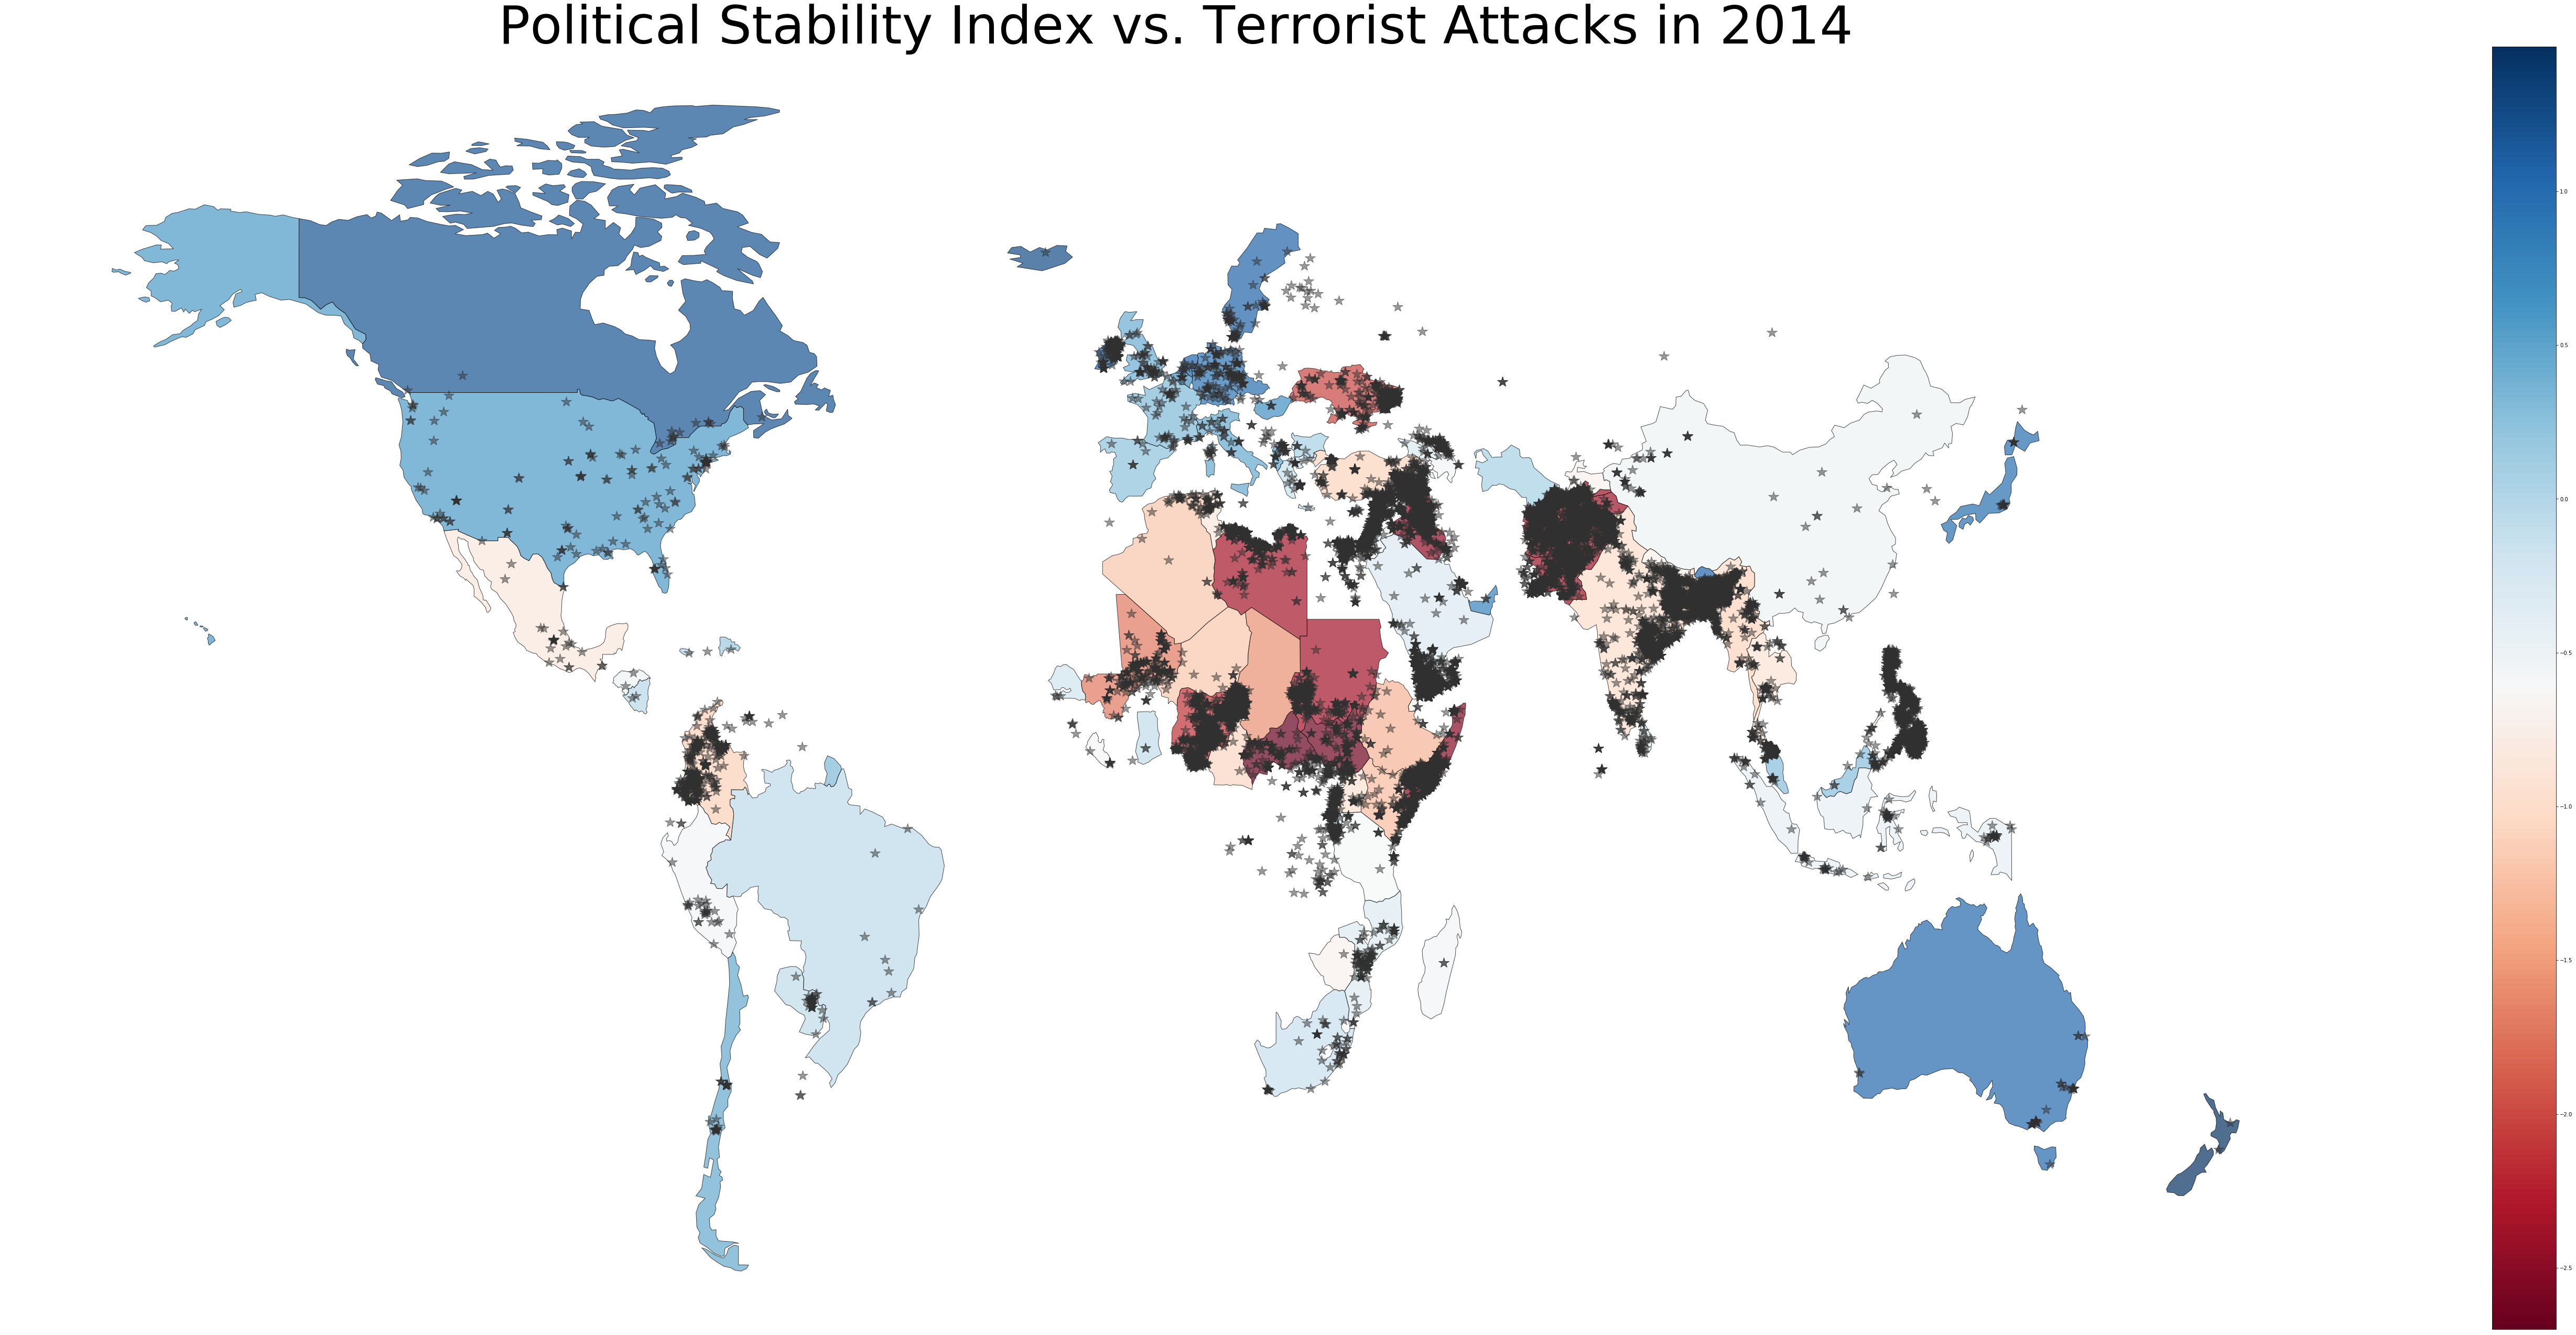

In [206]:
fig, ax = plt.subplots(figsize=(100, 45))
country_polygons2014.plot(ax=ax, edgecolor="black", column = "2014_psi", alpha = 0.7, legend=True, cmap = "RdBu")
plt.title("Political Stability Index vs. Terrorist Attacks in 2014", fontsize=100)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

x = list(df1["longitude"].values)
y = list(df1["latitude"].values)
ax.plot(x, y, marker='*', linestyle="none", color='#303030', markersize=20, alpha=0.5);

plt.show()

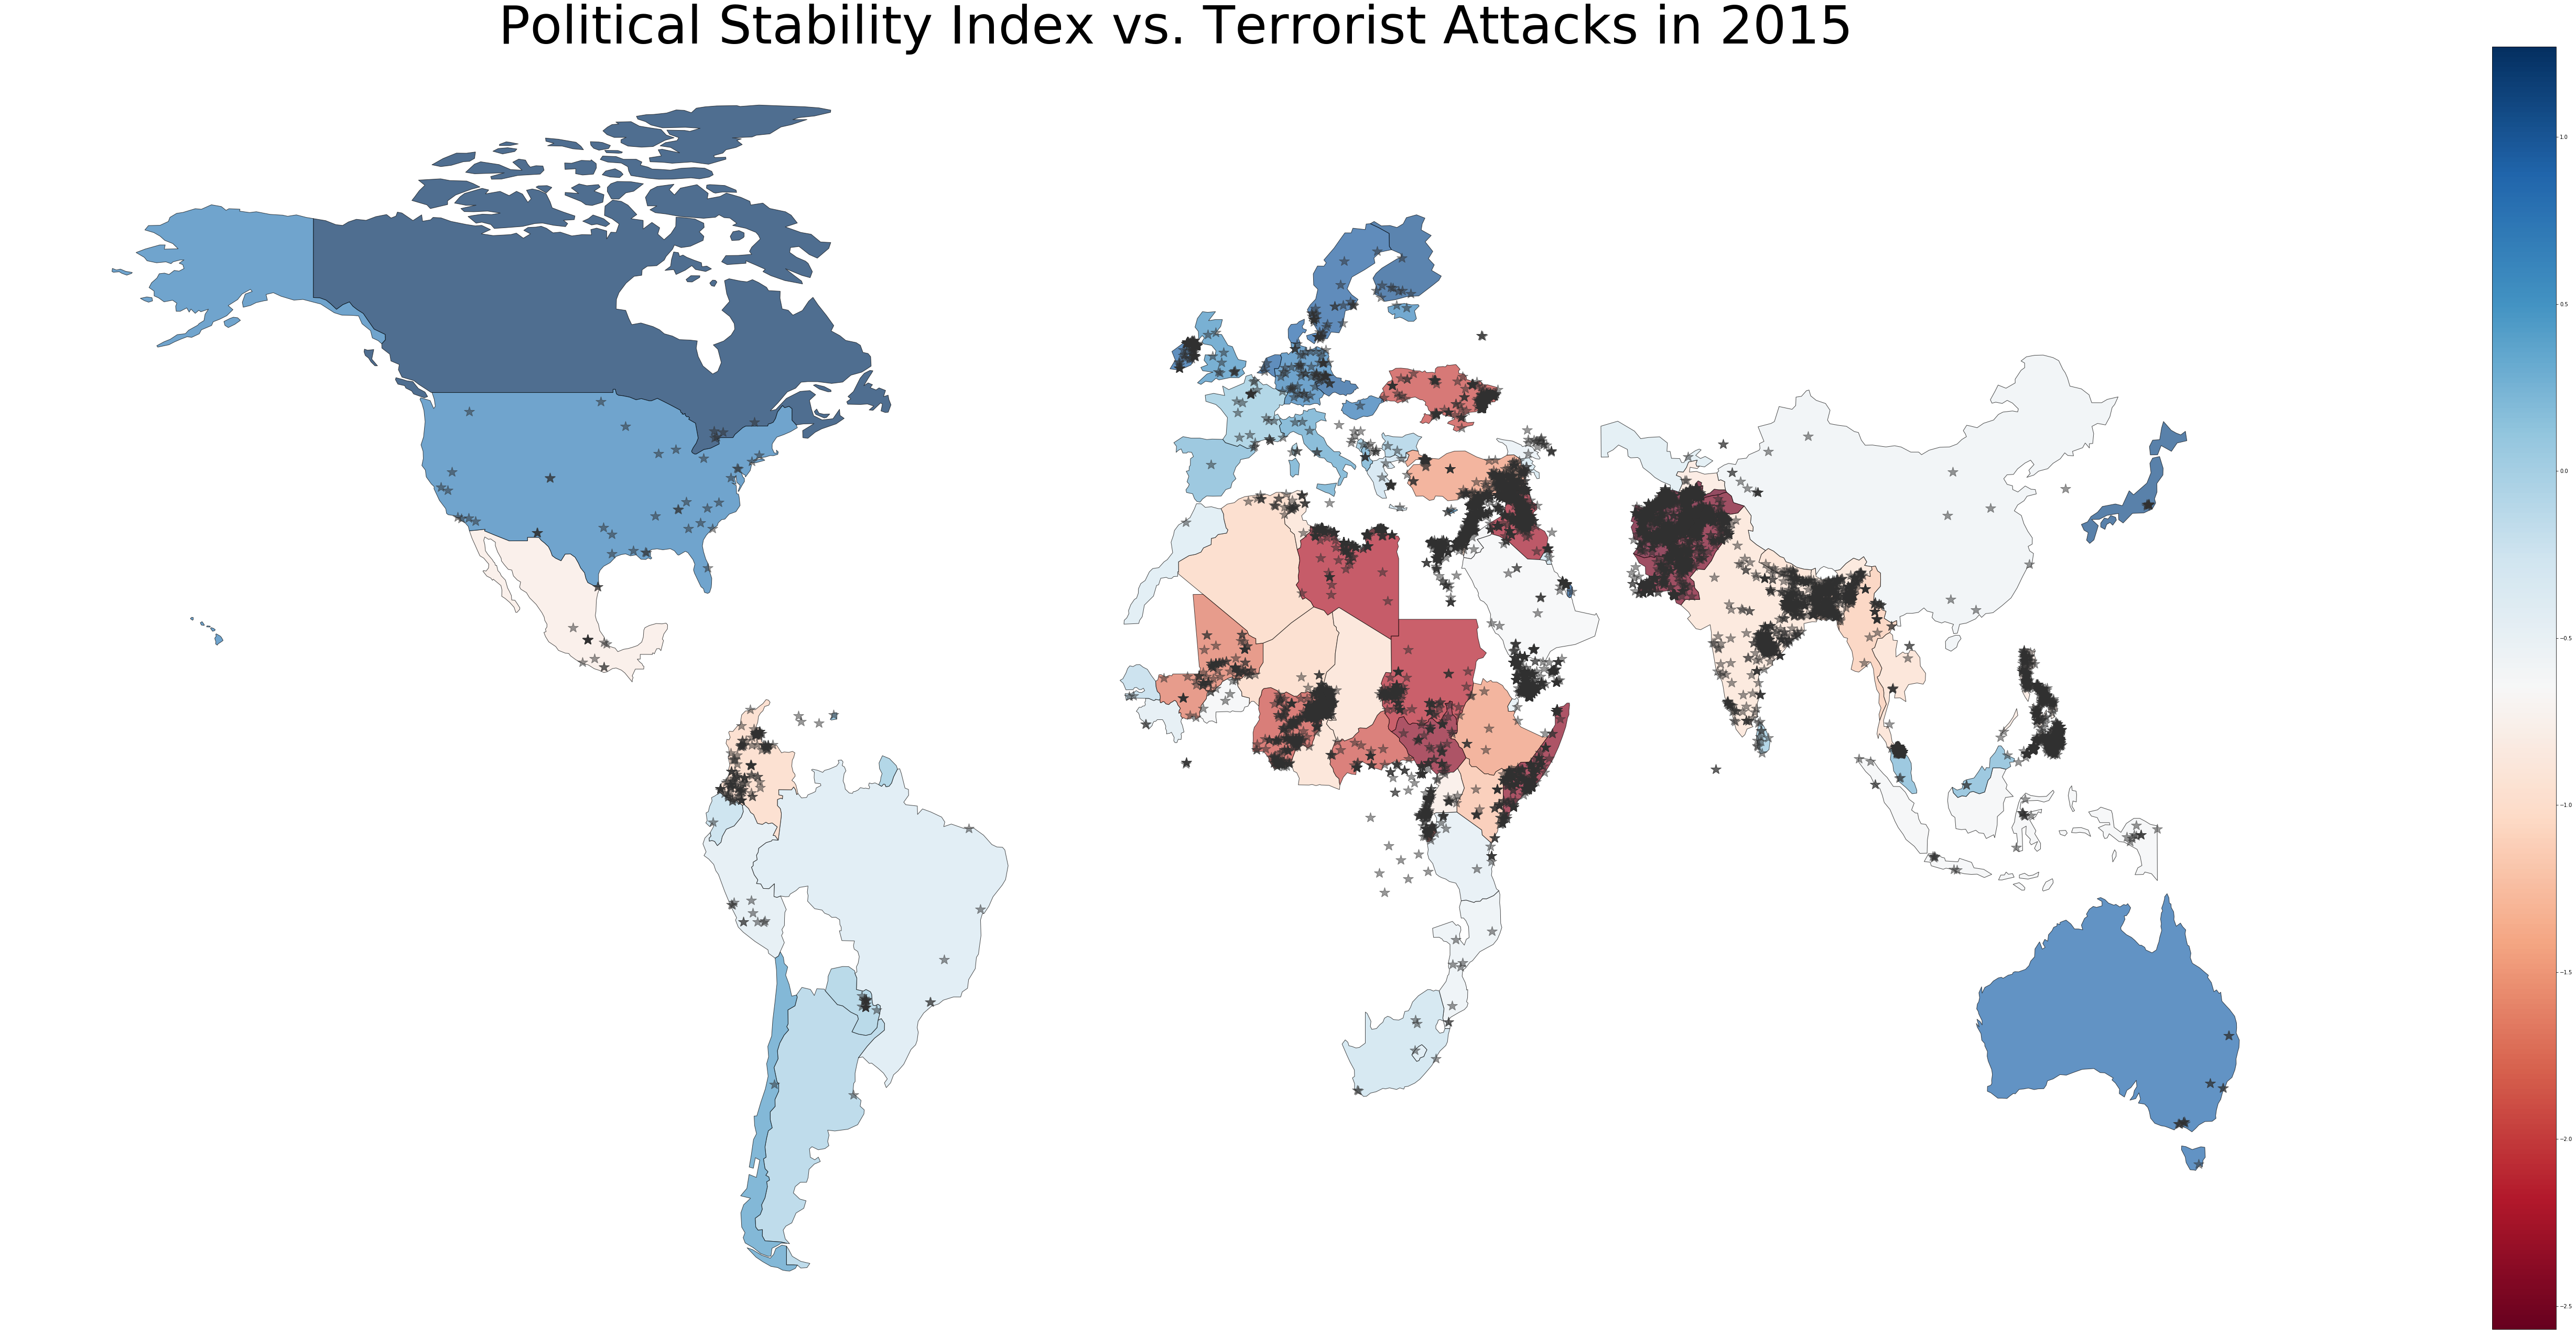

In [192]:
fig, ax = plt.subplots(figsize=(100, 45))
country_polygons2015.plot(ax=ax, edgecolor="black", column = "2015_psi", alpha = 0.7, legend=True, cmap = "RdBu")
plt.title("Political Stability Index vs. Terrorist Attacks in 2015", fontsize=100)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

x = list(df2["longitude"].values)
y = list(df2["latitude"].values)
ax.plot(x, y, marker='*', linestyle="none", color='#303030', markersize=20, alpha=0.5);

plt.show()

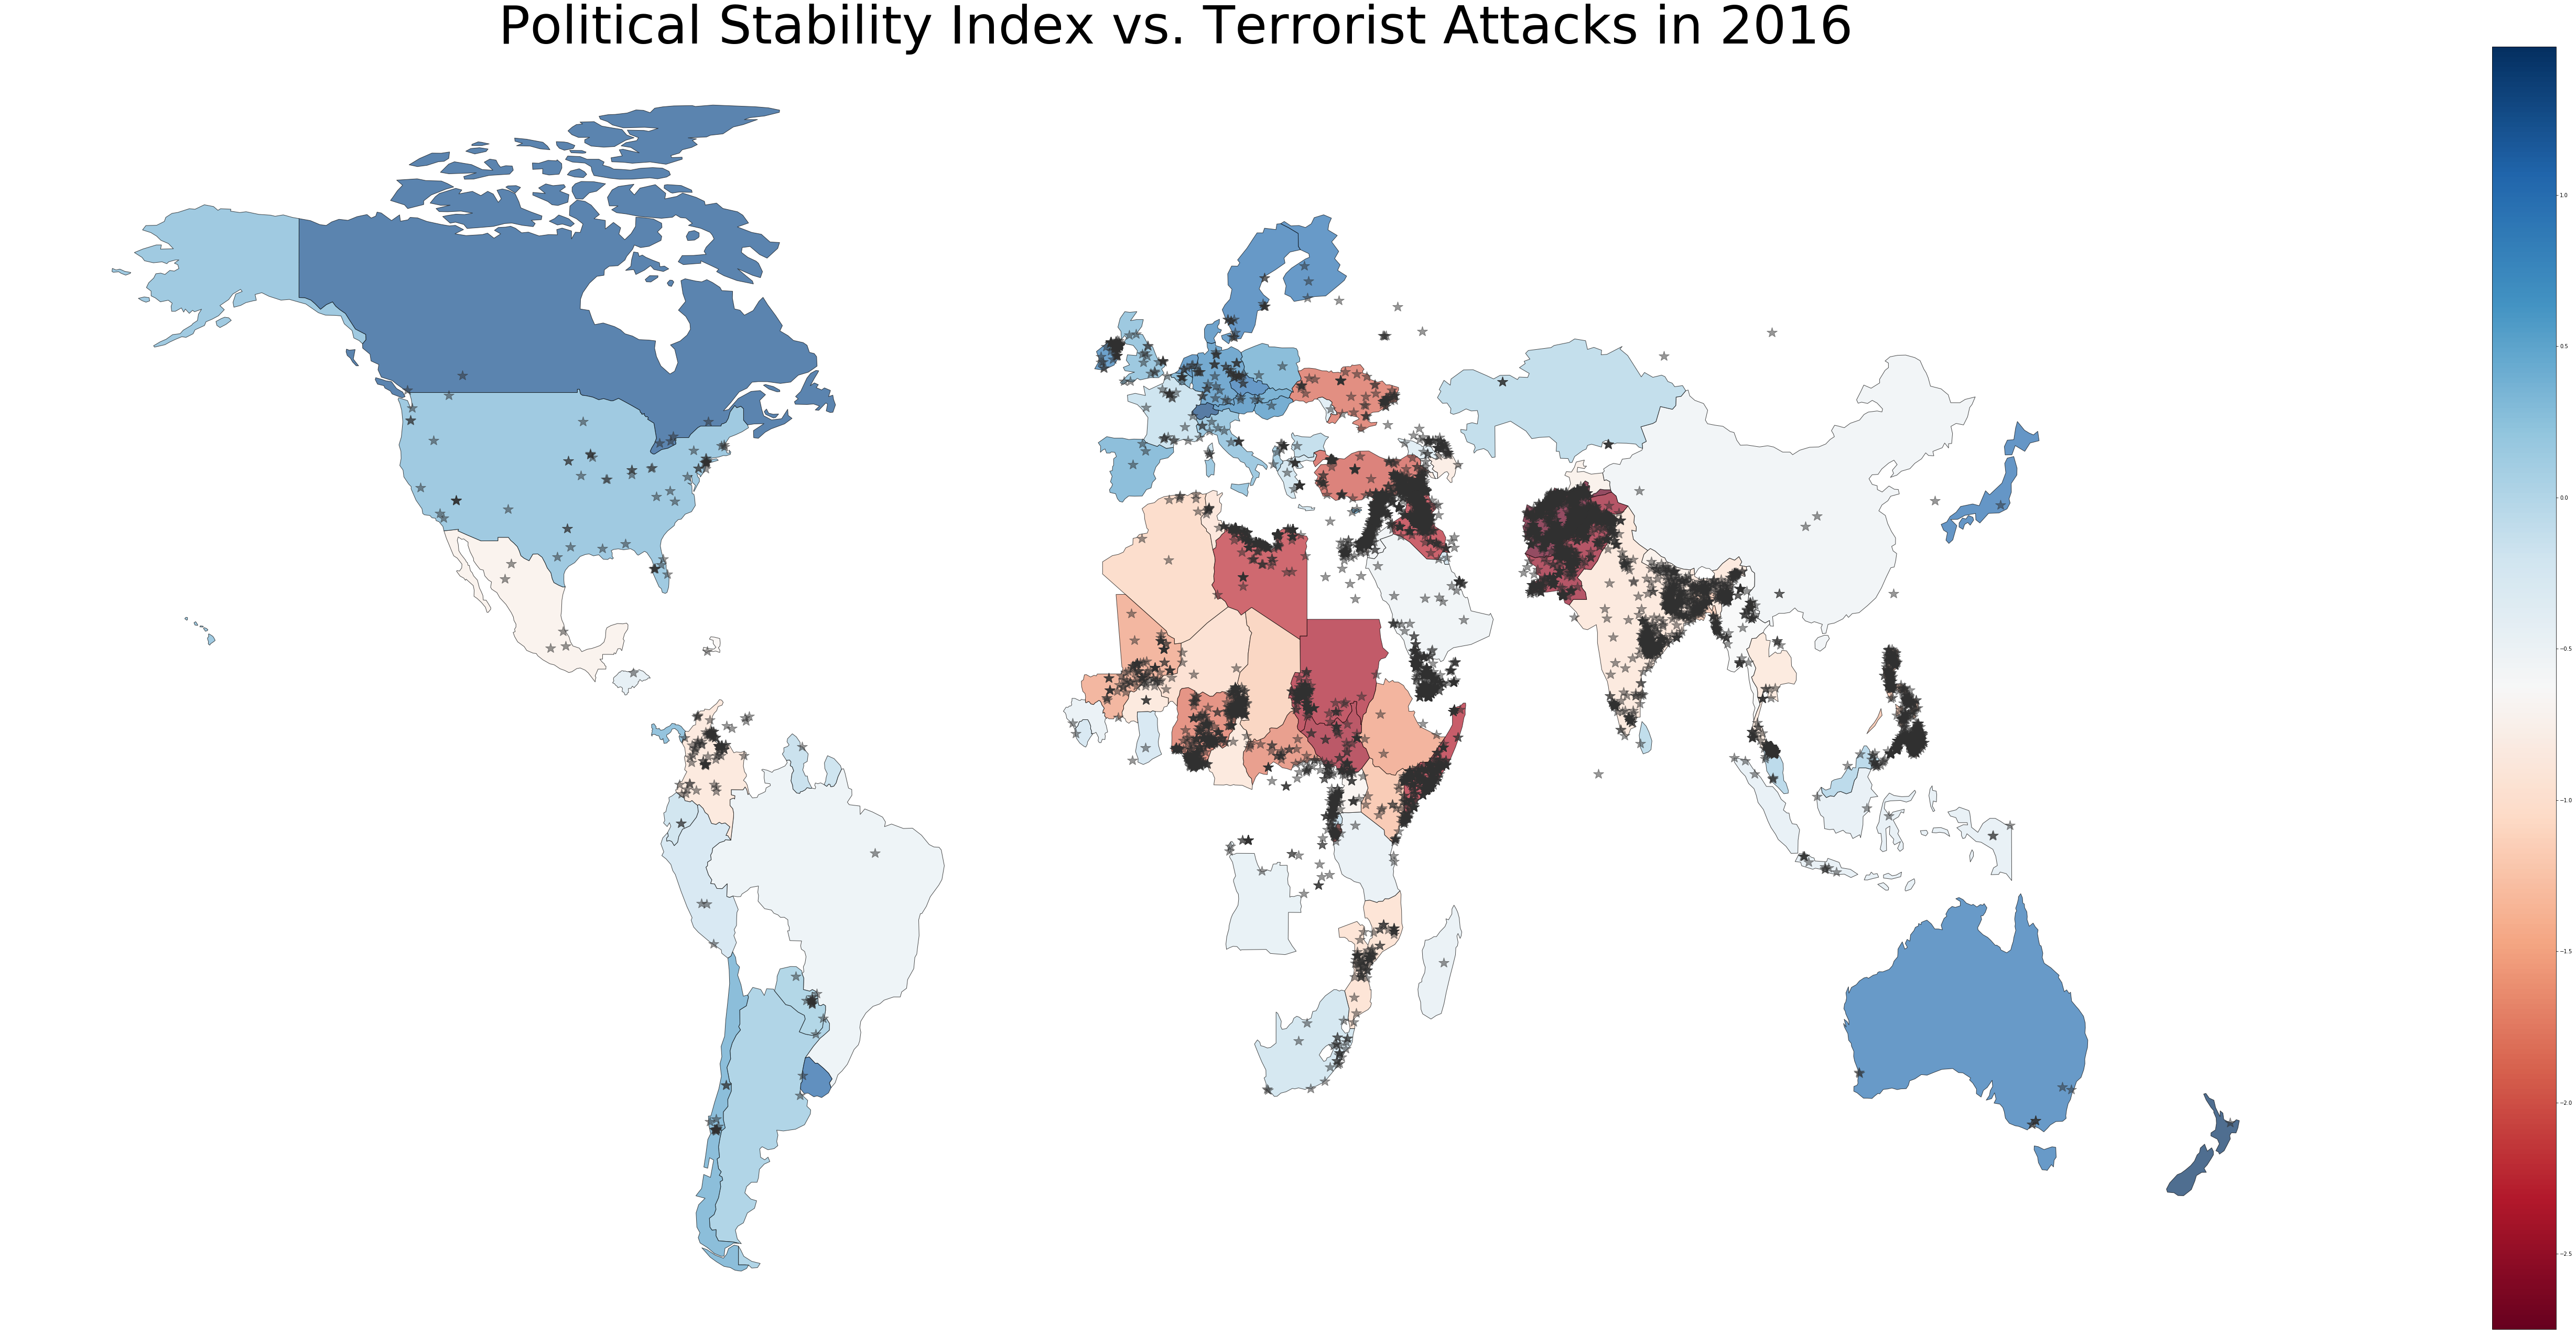

In [193]:
fig, ax = plt.subplots(figsize=(100, 45))
country_polygons2016.plot(ax=ax, edgecolor="black", column = "2016_psi", alpha = 0.7, legend=True, cmap = "RdBu")
plt.title("Political Stability Index vs. Terrorist Attacks in 2016", fontsize=100)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

x = list(df4["longitude"].values)
y = list(df4["latitude"].values)
ax.plot(x, y, marker='*', linestyle="none", color='#303030', markersize=20, alpha=0.5);

plt.show()

<h3>Observations & Analysis

Since we've previously discussed terrorism density and its global distribution, this section will first focus on the political stability index, and then on its descriptive relationship with terrorism density.

* Central and Subsaharan Africa is quite politically unstable as indicated by the great area shaded red. However, the political instability in this area decreased gradually from 2014 to 2016.
* Japan, Europe, USA, Canada, Australia, and New Zealand are the most politically stable countries. All of these countries are developed countries which then raises the question: what is the relationship and correlation between how developed (presumably economically) a country is and its political stability? We leave this question for future research.
* Personal side note: I am beginning to doubt the accuracy of the political stability index. This chloropleth map shows countries like Venezuala and Macedonia, which have been experiencing lots of governmental conflict, revolutions, political instability, etc. for the past few years, as pale pink and light blue respectively.
* Countries without PSI data are not drawn (white background).
* Notice how countries in Subsaharan Africa, the Middle Eastern Gulf and South Asia with high political instability also have high terrorism density.
* Contrary to the previous observation, some countries in Europe, such as Ireland, which have a high terrorism density, simultaneously have low political instability (high PSI).

Beyond this descriptive analysis, we must investigate some statistical relationships between terrorism and PSI to better comprehend their dynamic.

<h2>Regression Analysis

<left><h3>Regressing Political Stability Index (PSI) on Total Terrorism Casualities

This section regresses PSI on terrorism, measured as aggregated casualities per country. We will observe the regression for each of the three year's data to see if there are any significant differences between those points in time.

In [194]:
#Regression of the Sum of Casualities by Country in 2014, and each country's Political Stability Index (PSI) in 2014
reg2014 = country_polygons2014[["2014_sum_of_casualities", "2014_psi"]]
reg2014.columns = ["sumcas", "psi"]

#changing their names so that its easier to run ols regression
results2014 = smf.ols(formula = "psi ~ sumcas", data= reg2014).fit()  

print("Year: 2014")
print("Parameters: ")
print(results2014.params)
print("Summary Results: ")
print(results2014.summary())
#Estimating the linear relationship

Year: 2014
Parameters: 
Intercept   -0.382676
sumcas      -0.000134
dtype: float64
Summary Results: 
                            OLS Regression Results                            
Dep. Variable:                    psi   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     15.91
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           0.000148
Time:                        00:09:38   Log-Likelihood:                -110.13
No. Observations:                  81   AIC:                             224.3
Df Residuals:                      79   BIC:                             229.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [195]:
#Regression of the Sum of Casualities by Country in 2015, and each country's Political Stability Index (PSI) in 2015
reg2015 = country_polygons2015[["2015_sum_of_casualities", "2015_psi"]]
reg2015.columns = ["sumcas", "psi"]

results2015 = smf.ols(formula = "psi ~ sumcas", data= reg2015).fit()

print("Year: 2015")
print("Parameters: ")
print(results2015.params)
print("Summary Results: ")
print(results2015.summary())
#Estimating the linear relationship

Year: 2015
Parameters: 
Intercept   -0.370282
sumcas      -0.000161
dtype: float64
Summary Results: 
                            OLS Regression Results                            
Dep. Variable:                    psi   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     18.15
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           5.73e-05
Time:                        00:09:39   Log-Likelihood:                -103.61
No. Observations:                  79   AIC:                             211.2
Df Residuals:                      77   BIC:                             216.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [196]:
#Regression of the Sum of Casualities by Country in 2015, and each country's Political Stability Index (PSI) in 2015
reg2016 = country_polygons2016[["2016_sum_of_casualities", "2016_psi"]]
reg2016.columns = ["sumcas", "psi"]

results2016 = smf.ols(formula = "psi ~ sumcas", data= reg2016).fit()

print("Year: 2016")
print("Parameters: ")
print(results2016.params)
print("Summary Results: ")
print(results2016.summary())
#Estimating the linear relationship

Year: 2016
Parameters: 
Intercept   -0.319002
sumcas      -0.000133
dtype: float64
Summary Results: 
                            OLS Regression Results                            
Dep. Variable:                    psi   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     15.64
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           0.000154
Time:                        00:09:39   Log-Likelihood:                -121.20
No. Observations:                  90   AIC:                             246.4
Df Residuals:                      88   BIC:                             251.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

<h3>Observations & Analysis

* R-squared in all three regressions lies between 0.15 to 0.19, indicating that about 15-19% of the variation in the political stability index is explained by terrorism casualities.
* All of our regression coefficients and intercepts are statistically significant at the 95% confidence level. Additionally, the values for the regression coefficient are extremely small, about -0.0001. Since these values are statistically significant and very small, this means that the impact of terrorism casualities on political stability indices is extremely minor.
* All of the intercepts are approximately equivalent to -0.3 and are statistically significant as well. These intercepts are much larger than the regression coefficients, portraying how there exist other variables that have a much more potent impact on political stability indices.
* The variation between the results in the abovementioned three regressions is minimal.

<left><h3>Regressing Total Terrorism Casualities on Political Stability Index (PSI)

This section regresses terrorism on PSI. We will observe the regression for each of the three year's data to see if there are any significant differences between those points in time.

In [197]:
#Regression of the Sum of Casualities by Country in 2014, and each country's Political Stability Index (PSI) in 2014
results2014b = smf.ols(formula = "sumcas ~ psi", data= reg2014).fit()

print("Year: 2014")
print("Parameters: ")
print(results2014b.params)
print("Summary Results: ")
print(results2014b.summary())
#Estimating the linear relationship

Year: 2014
Parameters: 
Intercept     157.063804
psi         -1248.863118
dtype: float64
Summary Results: 
                            OLS Regression Results                            
Dep. Variable:                 sumcas   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     15.91
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           0.000148
Time:                        00:09:42   Log-Likelihood:                -759.99
No. Observations:                  81   AIC:                             1524.
Df Residuals:                      79   BIC:                             1529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [198]:
#Regression of the Sum of Casualities by Country in 2015, and each country's Political Stability Index (PSI) in 2015
results2015b = smf.ols(formula = "sumcas ~ psi", data= reg2015).fit()

print("Year: 2015")
print("Parameters: ")
print(results2015b.params)
print("Summary Results: ")
print(results2015b.summary())
#Estimating the linear relationship

Year: 2015
Parameters: 
Intercept     178.284426
psi         -1188.072171
dtype: float64
Summary Results: 
                            OLS Regression Results                            
Dep. Variable:                 sumcas   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     18.15
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           5.73e-05
Time:                        00:09:43   Log-Likelihood:                -728.39
No. Observations:                  79   AIC:                             1461.
Df Residuals:                      77   BIC:                             1466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [199]:
#Regression of the Sum of Casualities by Country in 2016, and each country's Political Stability Index (PSI) in 2016
results2016b = smf.ols(formula = "sumcas ~ psi", data= reg2016).fit()

print("Year: 2016")
print("Parameters: ")
print(results2016b.params)
print("Summary Results: ")
print(results2016b.summary())
#Estimating the linear relationship

Year: 2016
Parameters: 
Intercept     201.449448
psi         -1136.195079
dtype: float64
Summary Results: 
                            OLS Regression Results                            
Dep. Variable:                 sumcas   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     15.64
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           0.000154
Time:                        00:09:44   Log-Likelihood:                -839.48
No. Observations:                  90   AIC:                             1683.
Df Residuals:                      88   BIC:                             1688.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

<h3>Observations & Analysis

* R-squared in all three regressions is the same as previously discussed for obvious statistical reasons; it lies between 0.15 to 0.19, indicating that about 15-19% of the variation in the political stability index is explained by terrorism casualities.
* All of our regression coefficients are statistically significant at the 95% confidence level. Additionally, the values for the regression coefficient are extremely large in the absolute value sense. They range from about -1200 to -1100. Since these values are statistically significant and very large, this means that the impact of political stability on terrorism casualities indices is quite large. Moreover, the variables are inversely correlated.
* None of the intercepts are statistically significant. These intercepts are much smaller than the regression coefficients, portraying how there exist some other variables that explain terrorism casualities.
* The variation between the results in the abovementioned three regressions is minimal.

<h2>Summary & Concluding Remarks

Now that we have gone through all the data visualization and analysis, we will recap the key points and then propose areas for further research.

From our descriptive analysis, we learned that most countries' in the top 20 countries for total casualities caused by terrorism, consistently appeared in the top 20 from 2014 to 2015. Next, we observed terrorism density and its global distribution, which revealed to us which regions experience a greater number of terrorist events and attacks. Then, we visually compared terrorism density to the political stability index and we noticed that many countries with high terrorism density also had a low PSI. However, what was interesting to note is how some countries like Ireland, are very politcally stable, yet they experience a significant amount of terrorism. After that we resorted to a more quantitative analytical approach through OLS regressions. We learned that although terrorism does not explain much of political instability, political stability holds a strong inverse relationship with terrorism casualities.

<h3>Further Investigation</h3>

Below I have added some questions I came up with for future research to expand on this project...
* What is the relationship between how developed a country is and its political stability? What factors contribute to a high PSI?
* What is the impact of terrorism and its casualities on the investment climate, observed through sovreign credit risk ratings and stock indices?
    * Note: I primarily wanted to research this question. However, I could not find any accessible data online to perform such analysis. All historical data on credit ratings are locked and sold for a significant charge. With regards to stock indices, it is extremely difficult to find historical data on stock index performance for the indices outside of the USA.
* How are different types of terrorism distributed globally? Do some types concentrate in specific regions?
